## K-NN  Iris Flowers Dataset

### Import modules

In [138]:
from csv import reader
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np  
from random import randrange

### *Function Definitions*

Generic functions

In [43]:
def load_file(filename):
	dataset = list()
	with open(filename, 'r') as file:
		file_reader = reader(file)
		for row in file_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset


def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 


More specific functions

In [132]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Distance of 2 vectors of dataset
def find_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2

  return sqrt(distance)
 
 # Locate the most similar neighbors
def find_most_freq_neighbor(knn_num, train_set, test_row):
  distances = list()
  sorted_dist = list()
  neighbors = list()
  
  for i in train_set:
    row_dis = find_distance(i, test_row)
    distances.append((i, row_dis))
  
# get k neighbors with the smallest distance
  distances.sort(key=lambda tup: tup[1])
  for j in range(knn_num):
    neighbors.append(distances[j][0])
  
  # i want to find in which class belong the majority of the k neighbors
  class_of_knn=most_frequent(neighbors)
  return class_of_knn[-1]


 # we need to create a train set & a test set 
def compute_knn_success_w_cross_val(dataset, n_folds):  #cross_validation_split
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
 
#   ----------- Fold level --------------------
	for r in range(n_folds):
		fold = list()
 		
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))  #steal randomly records of the data set & create a group of "len(dataset) / n_folds" records
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)  

#     -------- level of each Group of each Fold --------------------
# Create a train_set, a test_set w/o class specification, & a set of actual class of test set  
	succ_perc_sum = 0
	for grp in dataset_split:
		train_set = list(dataset_split)
		train_set.remove(grp)
		train_set = sum(train_set, [])
		test_set = list()
		actual_test_set = list()

#       ------ level of row of each group of each Fold --------------------
# Empty class info of test set & keep class info in actual test set
		for row in grp:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None               #hide values of test set in order to predict them
			actual_test_set.append(list(row))   #keep actual values of test set
			
		# Predict values of test set using training set
		for row in test_set:
			row[-1] = find_most_freq_neighbor(num_neighbors, train_set, row)

#     -------- level of each Group of each Fold --------------------
		# Evaluate Prediction vs Reality 
		model_success_percentage = compare_pred_actual_perc(test_set, actual_test_set)
		succ_perc_sum = model_success_percentage +  succ_perc_sum

#     -------- level of each Group of each Fold --------------------
	tot_sucess_perc = succ_perc_sum / n_folds
	return tot_sucess_perc

# Compare Actual values wth predicted to get sucess perentage %
def compare_pred_actual_perc(prediction, actual):
	correct = 0
	for i in range(len(prediction)):
		if actual[i] == prediction[i]:
			correct += 1
		success = correct / len(actual) * 100.0
	return success
 
	

### *Final main algorithm that takes input data with the number of neighbors selected and returns percentage of success*

In [129]:
def kNN(x_filename,num_neighbors):
	filename = x_filename
	x_dataset = load_file(filename)

	# convert input from string to numbers
	row_len = len(x_dataset[0])
	for i in range(row_len-1):    
	  str_column_to_float(x_dataset, i)

	# Replace class names with numbers (like a dictionary: 1 for 'Iris-setosa', 2 for 'Iris-setosa', 3 for 'Iris-virginica')
	correlate_dict = dict()
	class_names = set([row[-1] for row in x_dataset])
	for i, cl_name in enumerate(class_names,1):
	  correlate_dict[cl_name] = i
	for row in x_dataset:
			row[-1] = correlate_dict[row[-1]]   #here we substitute class name "iris-setosa with 1.. etc.."

	# Split dataset to train and test set, copyning the actual va;ues of test set in actual_test_set
	model_success_percentage = compute_knn_success_w_cross_val(x_dataset, 8)   #for k-fold of cross valid, we set k=8
	return model_success_percentage

### *Play with number of neighbors and Datasets*

Maximum percentage of Prediction for this dataset:  70.57291666666666  using  173  neighbors


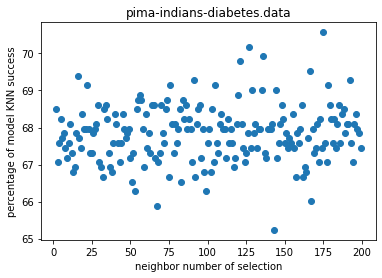

In [139]:
perc_list = list()
nn_for_max_propab = 0
max_prop = 0.0
r_nn_str= 1
r_nn_end= 200
_filename = 'pima-indians-diabetes.data'

for num_neighbors in range (r_nn_str,r_nn_end):
	perc_list.append(kNN(_filename, num_neighbors))

nn_for_max_propab = np.argmax(perc_list)
max_prop = perc_list[nn_for_max_propab]
print('Maximum percentage of Prediction for this dataset: ', str(max_prop), '% using ', str(nn_for_max_propab), ' neighbors' )

neib = range (r_nn_str,r_nn_end)

plt.plot(neib, perc_list, marker='o',linewidth=0) 

# naming the x axis 
plt.xlabel('neighbor number of selection') 
# naming the y axis 
plt.ylabel('percentage of model KNN success') 

# giving a title to my graph 
plt.title(_filename) 

# function to show the plot 
# plt.legend()
plt.show() 



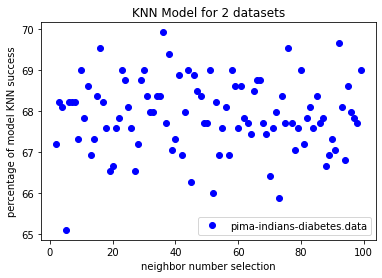

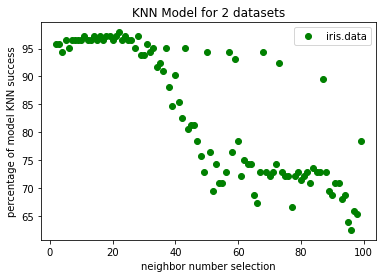

In [141]:

_filename2 = 'iris.data'
_filename1 = 'pima-indians-diabetes.data'
_filenames = (_filename1, _filename2)

# for i in _filenames:
for idx, filename in enumerate(_filenames):
	perc_list = list()

	for num_neighbors in range (2,100):
	  perc_list.append(kNN(filename, num_neighbors))

	neib = range (2,100)
 
	if idx%2 == 1:
		colr= 'g'
	else:
		colr= 'b' 

	plt.plot(neib, perc_list, marker='o',linewidth=0, color= colr, label = filename) 

	# naming the x axis 
	plt.xlabel('neighbor number selection') 
	# naming the y axis 
	plt.ylabel('percentage of model KNN success') 

	# giving a title to my graph 
	plt.title('KNN Model for 2 datasets') 

	# function to show the plot 
	plt.legend()
	plt.show() 
